In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/Users/hariharan/Documents/Documents/Machine-Learning/Logistic-Regression/Titanic/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data['Age'].fillna(data["Age"].mean(),inplace=True)

/var/folders/5t/r370vm0n5735y987_gwsg89h0000gn/T/ipykernel_57535/3972682830.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data["Age"].mean(),inplace=True)


In [5]:
data["Cabin"] = data['Cabin'].fillna(method='bfill')# done first ffill then i did bfill

/var/folders/5t/r370vm0n5735y987_gwsg89h0000gn/T/ipykernel_57535/763105978.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Cabin"] = data['Cabin'].fillna(method='bfill')# done first ffill then i did bfill


In [6]:
data["Embarked"] = data['Embarked'].fillna(method='ffill')

/var/folders/5t/r370vm0n5735y987_gwsg89h0000gn/T/ipykernel_57535/2080482217.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Embarked"] = data['Embarked'].fillna(method='ffill')


In [7]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

Unique Values

In [8]:
for i in data.columns:
    unique_values = data[i].unique()  
    print(f"Unique Values of column '{i}' are:", unique_values)  


Unique Values of column 'PassengerId' are: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236

One Hot Encoding

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


In [10]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(data[['Sex']]).toarray()
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Sex']))
data = pd.concat([data, encoded_df], axis=1)
print(data)

     PassengerId  Survived  Pclass  ... Embarked Sex_female  Sex_male
0              1         0       3  ...        S        0.0       1.0
1              2         1       1  ...        C        1.0       0.0
2              3         1       3  ...        S        1.0       0.0
3              4         1       1  ...        S        1.0       0.0
4              5         0       3  ...        S        0.0       1.0
..           ...       ...     ...  ...      ...        ...       ...
886          887         0       2  ...        S        0.0       1.0
887          888         1       1  ...        S        1.0       0.0
888          889         0       3  ...        S        1.0       0.0
889          890         1       1  ...        C        0.0       1.0
890          891         0       3  ...        Q        0.0       1.0

[891 rows x 14 columns]


In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S,0.0,1.0


Lable Encoding(Cabin and Embarked)

In [12]:
le = LabelEncoder()
data['Embarked_Label'] = le.fit_transform(data['Embarked'])
data['Cabin_Label'] = le.fit_transform(data['Cabin'])
data = data.drop(columns=['Embarked', 'Cabin'])
print(data)

     PassengerId  Survived  Pclass  ... Sex_male Embarked_Label  Cabin_Label
0              1         0       3  ...      1.0              2           81
1              2         1       1  ...      0.0              0           81
2              3         1       3  ...      0.0              2           55
3              4         1       1  ...      0.0              2           55
4              5         0       3  ...      1.0              2          129
..           ...       ...     ...  ...      ...            ...          ...
886          887         0       2  ...      1.0              2           30
887          888         1       1  ...      0.0              2           30
888          889         0       3  ...      0.0              2           60
889          890         1       1  ...      1.0              0           60
890          891         0       3  ...      1.0              1          147

[891 rows x 14 columns]


In [13]:
data = data.drop(columns=['Name', 'Ticket', 'Sex'])

In [14]:

data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_Label,Cabin_Label
0,1,0,3,22.0,1,0,7.2500,0.0,1.0,2,81
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,0,81
2,3,1,3,26.0,0,0,7.9250,1.0,0.0,2,55
3,4,1,1,35.0,1,0,53.1000,1.0,0.0,2,55
4,5,0,3,35.0,0,0,8.0500,0.0,1.0,2,129


Split the data 

In [15]:
X = data.drop(columns=['Survived'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Standard Scaler

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall * 100:.2f}%")
print(f"Accuracy: {accuracy * 100:.2f}%")

Recall: 83.33%
Accuracy: 84.44%


Training the Navie Bayes model on the Training dataset

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train_scaled, y_train)
y_pred_nb = naive_bayes_model.predict(X_test_scaled)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

recall_nb = recall_score(y_test, y_pred_nb)
print(f"Naive Bayes Recall: {recall_nb * 100:.2f}%")


Naive Bayes Accuracy: 81.11%
Naive Bayes Recall: 80.56%


Discision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree_model.predict(X_test_scaled)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

recall_dt = recall_score(y_test, y_pred_dt)
print(f"Decision Tree Recall: {recall_dt * 100:.2f}%")


Decision Tree Accuracy: 75.56%
Decision Tree Recall: 72.22%


Confusion Matrix

Confusion Matrix:
[[42 12]
 [10 26]]


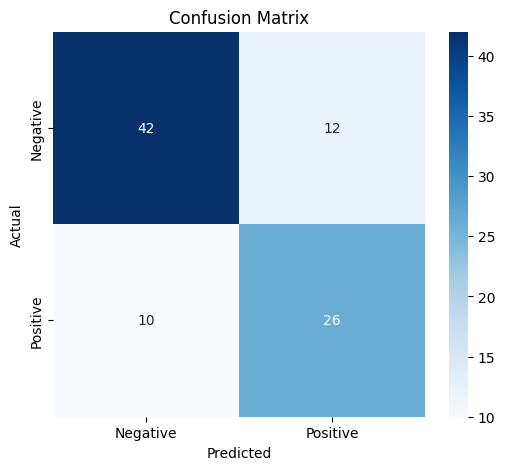

In [20]:
cm = confusion_matrix(y_test, y_pred_dt)


print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


KNN For Titanic

In [21]:
X = data.drop(columns=['Survived'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=15)

In [33]:
pred = knn.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[47  7]
 [23 13]]


In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76        54
           1       0.65      0.36      0.46        36

    accuracy                           0.67        90
   macro avg       0.66      0.62      0.61        90
weighted avg       0.66      0.67      0.64        90



In [25]:
# Accuracy rate

accuracy_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,data,data['Survived'],cv=10)
    accuracy_rate.append(score.mean())

In [26]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,data,data['Survived'],cv=10)
    error_rate.append(1 - score.mean())

Text(0, 0.5, 'Error Rate')

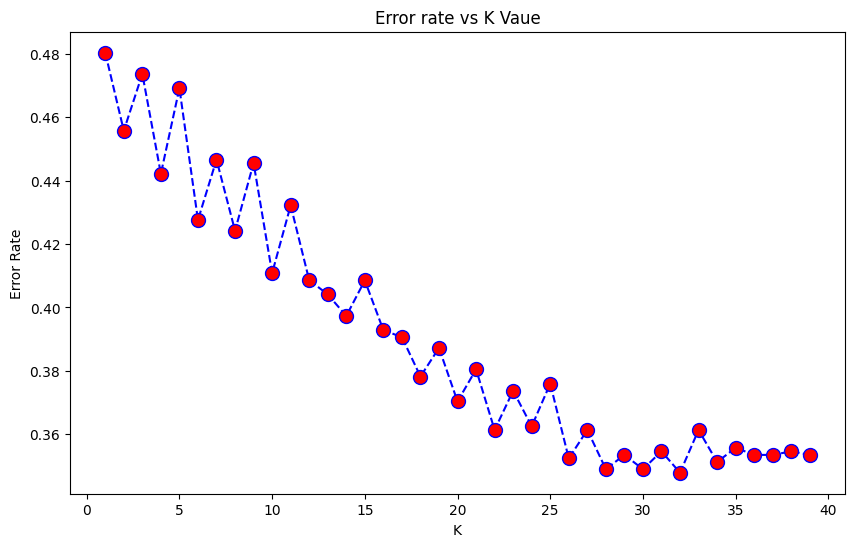

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title("Error rate vs K Vaue")
plt.xlabel('K')
plt.ylabel('Error Rate')